## Graphs Algorithms Overview

In [ ]:
# DFS, BFS, Dijsktras, Uniform Cost, Kruskals (Union/Find), Warshalls, Floyds
# Depth Limited Search (DLS) , Iterative deepening DLS , Hill Climbing (see n-queens), Beam Search (UNINFORMED)

# Greedy Best-First , A, A-Star (HEURISTICS)


# HERE: minmax, expectimax

# THEN: Summarise at end (plus change repo name, plus DLS/BLS from other notebook?)

In [114]:
# Algorithms use Edge Lists or Adjacency MAtrix (or Adjacency List)

# edge lists
#edges = [[0,7],[0,8],[6,1],[2,0],[0,4],[5,8],[4,7],[1,3],[3,5],[6,5]]
#n = 9
#edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
#n = 6

# from AI 
edges = [
    # Level 0 to Level 1
    (0, 1), (0, 2),
    # Level 1 to Level 2
    (1, 3), (1, 4), (2, 5), (2, 6),
    # Level 2 to Level 3
    (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (6, 14), (6, 13),
    # Level 3 to Level 4 (Completing 20 nodes)
    (7, 15), (8, 16), (9, 17), (10, 18), (11, 19)
]
n = 20

# create an adjacency matrix (allows efficient access of incident edges)
adj_mat = [[0]*n for _ in range(n)]
for edge in edges:
    adj_mat[edge[0]][edge[1]] = 1
    adj_mat[edge[1]][edge[0]] = 1 # undirected

adj_mat

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Depth Limited Search

A modified DFS that limits the search depth allowing for infinite search spaces
- For a tree depth is level from root
- For a graph, level is number of path hops

In [70]:
# modified dfs to depth limited search

def dls(source, visited, adj, dest, limit):
    visited[source] = True
    if source == dest:
        return "Found"
    elif limit < 0:
        return "Limit Reached"

    # check every edge of each vertex
    cutoff = False
    for i in range(len(adj)):
        
        # found so stop recursive calls
        if visited[dest]:
            break
            
        if adj[source][i] == 1 and not visited[i]: # a vertex we haven't seen yet
            result = dfs(i, visited, adj, dest, limit-1) # recurse with reduced level/limit

            if result == "Found":
                return "Found"
            elif result == "Limit Reached":
                cutoff = True
                return "Limit Reached"

    return "Limit Reached" if cutoff else "No Path Exists"

In [130]:
# works as expected but watch for "one off" errors on number of hops

# NOTE: see example below for how to return a path

visited = [False] * len(adj_mat)
source = 0
dest = 13
limit = 4

result = dls(source, visited, adj_mat, dest, limit)
print(result)
print(visited[dest])

Found
True


### An Example: Path Finding using Depth Limited Search

In [64]:
# Define the grid environment with obstacles (1 indicates obstacle, 0 indicates free cell)
grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
]

# Define initial and goal positions
initial_position = (0, 0)
goal_position = (4, 4)

In [65]:
# Define problem representation
class Problem:
    def __init__(self, grid, initial, goal):
        self.grid = grid
        self.initial_state = initial
        self.goal_state = goal

    def is_goal(self, state):
        return state == self.goal_state

    def expand(self, state):
        # Define possible movements: up, down, left, right
        movements = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        valid_moves = []
        for move in movements:
            new_x = state[0] + move[0]
            new_y = state[1] + move[1]
            # Check if the new position is within the grid and not an obstacle
            if 0 <= new_x < len(self.grid) and 0 <= new_y < len(self.grid[0]) and self.grid[new_x][new_y] == 0:
                valid_moves.append((new_x, new_y))
        return valid_moves

In [66]:
# DLS algorithm
def depth_limited_search(problem, depth_limit):
    return recursive_dls(problem.initial_state, problem, depth_limit)

def recursive_dls(node, problem, depth_limit):
    if problem.is_goal(node):
        return [node]
    elif depth_limit == 0:
        return "cutoff"
    else:
        for child in problem.expand(node):
            result = recursive_dls(child, problem, depth_limit - 1)
            if result == "cutoff":
                continue
            elif result != "failure":
                return [node] + result
        return "failure"

In [67]:
# Create problem instance
problem = Problem(grid, initial_position, goal_position)

# Find path using DLS with depth limit 10
depth_limit = 10
path = depth_limited_search(problem, depth_limit)
# Output path
if path == "failure":
    print("No path found within the depth limit.")
elif path == "cutoff":
    print("Search terminated due to depth limit.")
else:
    print("Path found:", path)

Path found: [(0, 0), (0, 1), (0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4)]


In [68]:
import matplotlib.pyplot as plt

# Visualization code
def visualize_path(grid, path):
    fig, ax = plt.subplots()
    # Create a grid with the same dimensions
    nrows, ncols = len(grid), len(grid[0])
    ax.set_xticks([x - 0.5 for x in range(1, ncols)], minor=True)
    ax.set_yticks([y - 0.5 for y in range(1, nrows)], minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.imshow(grid, cmap='Greys', interpolation='none')
    
    # Highlight the path
    if path:
        for (x, y) in path:
            ax.add_patch(plt.Circle((y, x), radius=0.3, color='blue'))
    
    # Highlight initial and goal positions
    ax.add_patch(plt.Circle((initial_position[1], initial_position[0]), radius=0.3, color='green'))
    ax.add_patch(plt.Circle((goal_position[1], goal_position[0]), radius=0.3, color='red'))
    
    plt.gca().invert_yaxis()
    plt.title("Original Grid with DLS Path")
    plt.show()

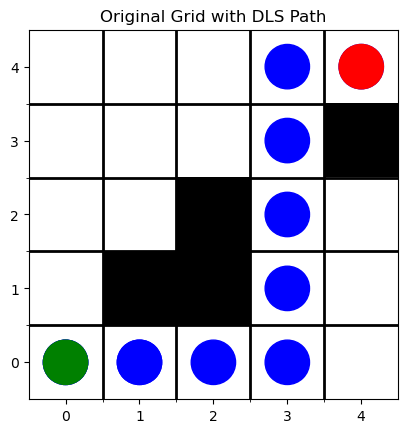

In [69]:
visualize_path(grid,path)

## Iterative Deepening Depth Limited Search 

Repeatadly runa DLS with increasing limit up to max limit.
A best of both worlds approach with space efficiency of DFS and optimality of BFS.

Quicker than DLS if node is close as DLS will fully traverse to each limit.

See the lecture notes (searchAlgorithms.pdf) for a visualization of each iteration.

In [146]:
# Just iteratively call DLS
# However, weird bug below, result not same as individual dls calls, returning from loop in function??

def iterative_deep_dls(visited, source, dest, limit, adj_mat):
    
    for i in range(limit):
        result = dls(source, visited, adj_mat, dest, i)

        if result == "Found":
            print("Found at Level " + str(i))
            return
        elif result == "No Path Exists":
            print("No Path Exists")
            return
        
            
    print("Limit Reached")
    return
        


In [147]:
visited = [False] * len(adj_mat)
source = 0
dest = 13
limit = 4

iterative_deep_dls(visited, source, dest, limit, adj_mat)

No Path Exists


In [143]:
visited = [False] * len(adj_mat)
source = 0
dest = 13
limit = 5

result = dls(source, visited, adj_mat, dest, limit)
print(result)

Found


## Heuristic (Informed) Graph Search Algorithms

### Greedy Best-First Search

Ignores cost to current node and just uses best heuristic
Uses priority queue to pick next best

In [1]:
import heapq

def greedy_best_first_search(graph, start, goal, heuristic):
    """
    Performs Greedy Best-First Search on a graph.

    Args:
        graph (dict): Adjacency list representation, e.g., {'A': ['B', 'C'], ...}
        start: The starting node.
        goal: The goal node.
        heuristic (dict): Heuristic values for each node, e.g., {'A': 10, ...}

    Returns:
        list: The path from start to goal if found, otherwise None.
    """
    # Priority queue stores tuples of (heuristic_value, node)
    priority_queue = [(heuristic[start], start)]
    visited = set()
    # Dictionary to reconstruct the path
    came_from = {start: None}

    while priority_queue:
        # Get the node with the lowest heuristic value (highest priority)
        _, current_node = heapq.heappop(priority_queue)

        if current_node == goal:
            # Reconstruct and return the path
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = came_from[current_node]
            return path[::-1] # Reverse the path to go from start to goal

        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor in graph.get(current_node, []):
            if neighbor not in visited:
                came_from[neighbor] = current_node
                # Add unvisited neighbors to the priority queue based on their heuristic value
                heapq.heappush(priority_queue, (heuristic[neighbor], neighbor))
                
    return None # Goal not reachable

In [4]:
# Graph represented as an adjacency list
graph_data = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Heuristic values (estimated distance to goal 'F')
heuristic_values = {
    'A': 6,
    'B': 4,
    'C': 4,
    'D': 3,
    'E': 2,
    'F': 0
}

start_node = 'A'
goal_node = 'F'

In [5]:
path = greedy_best_first_search(graph_data, start_node, goal_node, heuristic_values)

if path:
    print(f"Path found: {' -> '.join(path)}")
else:
    print("No path found.")


Path found: A -> B -> D


### Algorithm A Star

Unlike Greedy/Best, A star uses the cost to the current node __g__ as wells as the heuristic __h__ and chooses the best __f__ = __g__ + __h__

Example below uses A star to find the shortest path in a 2D grid using manhattan distance as heuristic. 
Uses a priority queue but could just step through from start to end evaluating possible moves for best __f__ along the way

NOTE: If the heuristic is admissible (never overestimates h) it is A Star, otherwise just the A Algorithm.

In [6]:
import heapq

class Node:
    """A node class for A* Pathfinding."""
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0  # Cost from start to this node
        self.h = 0  # Heuristic cost from this node to the goal
        self.f = 0  # Total cost (g + h)

    # overloading operators for easy comparison in priority queue
    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.f < other.f

In [7]:
def a_star(grid, start, end):
    """Returns a list of tuples as a path from the start to the end."""
    # could do just logically without the open and closed lists
    
    # Create start and end nodes
    start_node = Node(None, start)
    end_node = Node(None, end)

    # Initialize open and closed lists
    open_list = []
    closed_list = set() # Use a set for faster lookups

    # Push the start node to the open list
    heapq.heappush(open_list, start_node)

    # Loop until the open list is empty
    while open_list:
        # Get the node with the lowest f value from the open list
        current_node = heapq.heappop(open_list)

        # If the current node is the goal, reconstruct the path
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Move current node to the closed list
        closed_list.add(current_node.position)

        # Explore neighbors (up, down, left, right for simplicity)
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            # Get node position
            node_position = (current_node.position[0] + new_position[0],
                             current_node.position[1] + new_position[1])

            # Check if within grid bounds and not an obstacle (assuming 0 is walkable, 1 is obstacle)
            if (node_position[0] > (len(grid) - 1) or
                node_position[0] < 0 or
                node_position[1] > (len(grid[0]) - 1) or
                node_position[1] < 0 or
                grid[node_position[0]][node_position[1]] != 0):
                continue
            
            # Check if the neighbor has already been evaluated
            if node_position in closed_list:
                continue

            # Create new neighbor node
            neighbor = Node(current_node, node_position)

            # Calculate the g, h, and f values
            neighbor.g = current_node.g + 1 # Assuming uniform cost of 1 per move
            # Using Manhattan distance as heuristic: abs(end.x - neighbor.x) + abs(end.y - neighbor.y)
            neighbor.h = abs(end_node.position[0] - neighbor.position[0]) + abs(end_node.position[1] - neighbor.position[1])
            neighbor.f = neighbor.g + neighbor.h

            # Check if neighbor is already in the open list with a higher f value
            for open_node in open_list:
                if neighbor == open_node and neighbor.g > open_node.g:
                    break
            else:
                # Add the neighbor to the open list
                heapq.heappush(open_list, neighbor)
    
    return None # No path found

In [15]:
# Define the grid (0s are walkable, 1s are obstacles)
grid = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
]

start = (4, 4)
end = (9, 9)

In [16]:
path = a_star(grid, start, end)
print(f"Path found: {path}")

Path found: [(4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
